
- Valuate company using financial statement
  - Ratio Analysis
    - P/E ratio, P/B ratio
  - Steady growth?
  - How does it compare w other companies in the same industry?
    - Does it have an edge?
  - How did financial report affect previous prices 
- Long/Short term goal of the company
  - Sentiment analysis
    - Maybe if number of positive(Sentiment analysis) news regarding the company increased 
  - Summarize up to date new report
  - See if materials it uses or import will become cheaper.
- Incorporating ESG data


Performance metric
- For each above questions answered, +/- 1pt


In [ ]:
# pip install yfinance -U

In [1]:
# This adds variable into our env_variable
from dotenv import load_dotenv
def configure():
    load_dotenv()
configure()

In [2]:
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
import sys
import tensorflow as tf
import time
import yfinance as yf # the Yahoo! finance API is intended for personal use only.**
# import yahoo_fin.stock_info as si 

from datetime import timedelta, datetime
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
# from yahoofinancials import YahooFinancials as yf # OOD

2025-05-07 18:06:01.661327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(f"python version : {sys.version}")
print(f"pandas version : {pd.__version__}")
print(f"numpy version : {np.__version__}")

python version : 3.12.4 (v3.12.4:8e8a4baf65, Jun  6 2024, 17:33:18) [Clang 13.0.0 (clang-1300.0.29.30)]
pandas version : 2.2.2
numpy version : 1.26.4


# Utils

slice(None)
- is a Python object representing the full slice (:) in indexing operations. 
  When used in pandas, it tells pandas to select all elements along that 
  particular axis or level.

In [4]:
def convert_currency(old, new='usd'):
    """
    Get up-to-date currency ratio from old to new.
    return
    -----
    fx_ratio: float, 
        multiply by this amount from original amount to get value innew currency.
    """
    old, new = old.upper(), new.upper()
    fx_ticker = yf.Ticker(f'{old}{new}=X')
    fx_ratio = fx_ticker.history(period='1d')['Close'].iloc[-1]
    return fx_ratio

In [5]:
def ticker_to_name(ticker, stock_dict):
    """Get company's name via their stock ticker symbol"""
    pass

In [6]:
# hist_data = yf(['AAPL']).get_historical_price_data(start_date='2020-12-11',
#                                       end_date='2024-01-01',time_interval='daily')

# df = pd.DataFrame(hist_data['AAPL']['prices'])
# df = (df.drop(columns=['date'])
#     .rename(columns={"formatted_date":"date"})
#     .set_index('date')
#     .sort_index(ascending=True))
# df.index = pd.to_datetime(df.index)
# df['currency'] = hist_data['AAPL']['currency']

## Gen AI config

### Gemini

- gemini-2.5-flash-preview-04-17
- gemini-2.5-pro-preview-03-25
- gemini-2.0-flash
- gemini-2.0-flash-lite
- gemini-1.5-flash
- gemini-1.5-pro
- gemini-embedding-exp
- imagen-3.0-generate-002
- veo-2.0-generate-001

[pro vs flash Gemini](https://developers.googleblog.com/en/gemini-2-family-expands/)

In [6]:
import google.generativeai as genai

In [7]:
genai.configure(api_key=os.getenv('gemini_api_key'))
gemini = genai.GenerativeModel("gemini-2.0-flash-lite")
gemini

genai.GenerativeModel(
    model_name='models/gemini-2.0-flash-lite',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [ ]:
## Check list of models and their infomations
# list(genai.list_models())
# for m in genai.list_models():
#     if 'generateContent' in m.supported_generation_methods:
#         print(m.name)

In [ ]:
# Unless you re-initialize session, it considers previous prompts.
chat = gemini.start_chat()
chat.send_message("Hi, my name is Tates, I am currently in China. How are you?")

In [ ]:
response = chat.send_message("Hi, my name is Tates, I am currently in China. How are you?")

In [ ]:
response.text

### OpenAI

---

In [ ]:
usd2curr_list = ['USDKRW=X', 'USDCAD=X', 'USDJPY=X', 'USDCHF=X']
curr_df = yf.download(usd2curr_list, period='1000d', interval='1d')['Close']

In [ ]:
usd2curr_scaled_list = [f'{curr}_scaled' for curr in usd2curr_list]
std_scaler = StandardScaler()
std_scaler.fit(curr_df[usd2curr_list])
curr_df[usd2curr_scaled_list] = std_scaler.transform(curr_df[usd2curr_list])

In [ ]:
fig_currency = go.Figure()
for curr in usd2curr_scaled_list:
    fig_currency.add_trace(go.Scatter(x=curr_df.index,y=curr_df[curr], name=curr))
for curr in usd2curr_list:
    fig_currency.add_trace(go.Scatter(x=curr_df.index,y=curr_df[curr], name=curr))
    
fig_currency.update_layout(title='Currencies compared to USD')
fig_currency.show()

By looking at how fx ratio changes against USD we can understand how their economy is doing.

1.What are reasons that may make KRW stronger compared to USD???

In [ ]:
currencies = ['KRW', 'CAD', "JPY", "CHF"]

------

In [8]:
portforlio = {"Air Canada":"AC.TO",
              "Intel":"INTC",
              "Samsung":"005930.KS",
              "HD현대마린엔진":"071970.KS",
              "HD현대중공업":"329180.KS"
           }

stock_name_dict = {v:k for k,v in portforlio.items()}
portforlio_tickers = list(portforlio.values())
portf_stock_names = list(stock_name_dict.values())

In [9]:
# """
# Stock price via yahoofinancials API but has not been updated since 2023 and
# API seems to be broken.
# """
# hist_data = yf(portforlio_tickers).get_historical_price_data(start_date=st_date,
#                                                     end_date=end_date,
#                                                     time_interval='daily')

# stock_price_df_dict = {}
# for airline_nm, ticker in airlines.items():
#     print(airline_nm, ticker)
#     df = pd.DataFrame(hist_data[ticker]['prices'])
#     df = (df.drop(columns=['date'])
#         .rename(columns={"formatted_date":"date"})
#         .set_index('date')
#         .sort_index(ascending=True))
#     df.index = pd.to_datetime(df.index)
#     df['currency'] = hist_data[ticker]['currency']
#     stock_price_df_dict[ticker] = df

In [10]:
end_date = datetime.today().strftime('%Y-%m-%d')
st_date = (datetime.today() - timedelta(days=100)).strftime('%Y-%m-%d')
print(f"Getting data from {st_date} to {end_date}")

stock_df = yf.download(portforlio_tickers
                   , start=st_date
                   , end=end_date
                   # , group_by='ticker'
                   , interval='1d'
                   , threads=True
                  )

Getting data from 2025-01-27 to 2025-05-07
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [11]:
tickers = yf.Tickers(portforlio_tickers)

In [12]:
standardize_currency = False

if standardize_currency:
    for symbol, yf_ticker in tickers.tickers.items():
        currency = yf_ticker.info['currency']
        new_currency = 'USD'
    
        # convert to usd
        if currency != new_currency:
            conv_rate = convert_currency(currency, new=new_currency)
            # Or stock_df.loc[:, stock_df.columns.get_level_values(1) == 'Samsumg']
            stock_df.loc[:, (slice(None), symbol)] = stock_df.loc[:, (slice(None), symbol)] * conv_rate

In [13]:
stock_df.rename(columns=stock_name_dict, inplace=True)
stock_close_df = stock_df['Close'].copy()

In [ ]:
# fig_stock_price = go.Figure()
# for stock in stock_close_df.columns:
#     fig_stock_price.add_trace(go.Scatter(x=stock_close_df.index
#                                   ,y=stock_close_df[stock]
#                                   ,name=stock
#                                   ))
# fig_stock_price.update_layout(title="Closing price"
#                         # , yaxis_title='USD'
#                         # , xaxis_title='Stock trading dates'
#                        )
# fig_stock_price.show()

In [ ]:
# stock_close_scaled_df = stock_close_df.copy()
# std_scaler = StandardScaler()
# stock_close_scaled_df[portf_stock_names] = std_scaler.fit_transform(stock_close_scaled_df[portf_stock_names])

# fig_scl_stock_price = go.Figure()
# for stock in portf_stock_names:
#     fig_scl_stock_price.add_trace(go.Scatter(x=stock_close_scaled_df.index
#                                   ,y=stock_close_scaled_df[stock]
#                                   ,name=stock
#                                   ))
# fig_scl_stock_price.update_layout(title="Closing price (scaled)"
#                         , yaxis_title='USD'
#                         # , xaxis_title='Stock trading dates'
#                        )
# fig_scl_stock_price.show()

# 0. Portfolio assessment

So we can differentiate many type of earning:
- `Revenue`: Total amount of services and goods sold
- `Gross Income`: Revenue - COGS
- `EBIT(Earnings Before Interests and Taxes)`: Revenue - COGS - operation costs
- `Net Income`: EBIT - Interests and Taxes

`Shares`
- `Issued shares`: all stocks company has issued
- `Outstanding shares`: Shares that are owned by investors and available for them to trade.

`Return on Equity (ROE)`
$$ = {Net \space Income \over Shareholder's \space equity} $$
- `(Net worth) Shareholder's equity`: Asset - liabilities

`Basic Vs. Diluted EPS`
- EPS take only common shares into account while diluted EPS includes convertible securities, employee stock options, and secondary offerings.

$$EPS = {Net Income - preferred \space diviends \over \# shares \space outstanding}$$


`Price to Earnings (P/E) ratio`:
$$= {price \space per \space share \over EPS}$$

`Price to Book(P/B) ratio`:
- book value: tangible assets - liabilities. (a.k.a. price company is left with if it were to be bankrupt right now)
- Lower the better
$$ ={price \space per \space share \over bookvalue \space per \space share}$$



???
See growth of ratios

In [14]:
air_canada = tickers.tickers['AC.TO']

Total Revenue:
-  Operating Revenue: Core revenue from air travel, cargo, and other main operations. Does not include things like interest income or asset sales.


Total expenses:
- `Cost of Revenue` (a.k.a. COGS):
  - Fuel
  - Maintenance and Repair
  - DDA cost of revenue
  - other cost of revenue
- `Operating expenses`: Broad category of non-direct costs. Typically includes SG&A, depreciation, and other overhead.
  - SG&A: Selling includes ads, General and administrative includes rent, wages, etc...
- `Interest expense`: cost of borrowing
- `Tax provision`: negative indicate tax benefit

*wages are included in both `Cost of Revenue` and `SG&A` however employees that direct produce services like pilot, crew are included in `Cost of Revenue` where as indirect employees like HR, Finance, IT are included in `SG&A`

In [16]:
def add_stats(df, statement, x):
    for stat in x:
        try:
            # df['_'.join(_.lower().split())] = statement.loc[stat].values
            df[stat] = statement.loc[stat].values
        except KeyError:
            continue
    return df

In [17]:
# Ratio analysis
revenue_related_stats = ['Total Revenue', 'Operating Revenue', 'Net Income']
cost_related_stats = ['Total Expenses', 'Cost Of Revenue','Operating Expense',
        'Other Operating Expenses', 'Interest Expense', 'Tax Provision']

dfs = []
for nm, ticker in tickers.tickers.items():
    stock_nm = stock_name_dict[nm]
    industry = ticker.info['industry']
    shares_outst = ticker.info['sharesOutstanding']
    curr_price = ticker.info['currentPrice'] # ??? Price on announcement date?
    balance_sheet = ticker.balance_sheet
    income_stmt = ticker.income_stmt
    
    # ROE
    shareholder_equity = balance_sheet.loc['Total Assets'] \
                    - balance_sheet.loc['Total Liabilities Net Minority Interest']
    roe = income_stmt.loc['Net Income'] / shareholder_equity
    roe.rename("roe", inplace=True)
    
    # P/E ratio
    pe_ratio = curr_price / income_stmt.loc['Basic EPS']
    pe_ratio.rename("pe_ratio", inplace=True)
    
    # P/B ratio
    book_value_ps = balance_sheet.loc['Stockholders Equity'] / shares_outst
    pb_ratio = curr_price / book_value_ps
    pb_ratio.rename("pb_ratio", inplace=True)
    
    df = pd.concat([roe, pe_ratio, pb_ratio], axis=1)
    df['company'] = [stock_nm]*len(roe)
    df['industry'] = [industry]*len(roe)

    # Revenue/Cost sources
    df = add_stats(df, income_stmt, revenue_related_stats)
    df = add_stats(df, income_stmt, cost_related_stats)

    dfs.append(df)

In [18]:
analysis_result_df = pd.concat(dfs)
analysis_result_df.sort_index(inplace=True)

In [ ]:
analysis_result_df

In [28]:
# !touch ../data/lucerna
# !rm ../data/lucerna
# !mkdir ../data/lucerna
analysis_result_df.to_parquet("../data/lucerna/analysis_result_df.parquet")

In [ ]:
fig_costs = go.Figure()

df = analysis_result_df.loc[analysis_result_df['company'] == 'Air Canada'].copy()
for cost in cost_related_stats + revenue_related_stats:
    fig_costs.add_trace(
        go.Scatter(
            x = df.index,
            y = df[cost],
            name=cost
        )
    )
fig_costs.update_layout(title="Revenue and Costs")
fig_costs.show()

Costs should never be sole metric considered as company may spend more in return of larger profit.<br>
Increase in Cost of Revenue(a.k.a. direct costs):
- Oil price?
- More maintainance?

Increase in OE:
- More money spent on ads? building costs? wages? depreciation of aircraft prices?

Note: Often times PER is denoted N/A if it is negative since it cannot be interpreted => negative earnings

In [ ]:
# ROE on yahoo financials. Bit different.
for _, ticker in tickers.tickers.items():
    print(_, ticker.info['returnOnEquity'])

### 0.1. EPS, price curve

In [ ]:
annual_eps_dfs = []
qrt_eps_dfs = []
for nm, ticker in tickers.tickers.items():
    annual_eps_df = ticker.income_stmt.loc[['Basic EPS']].T.resample("D").ffill().rename(columns={"Basic EPS":stock_name_dict[nm]})
    annual_eps_dfs.append(annual_eps_df)
    qrt_eps_df = ticker.quarterly_income_stmt.loc[['Basic EPS']].T.resample("D").ffill().rename(columns={"Basic EPS":stock_name_dict[nm]})
    qrt_eps_dfs.append(qrt_eps_df)

annual_eps_df = pd.concat(annual_eps_dfs, axis=1)
annual_eps_df.columns = pd.MultiIndex.from_product([['annual_eps'], annual_eps_df.columns])
qrt_eps_df = pd.concat(qrt_eps_dfs, axis=1)
qrt_eps_df.columns = pd.MultiIndex.from_product([['quarterly_eps'], qrt_eps_df.columns])

eps_df = pd.concat([annual_eps_df, qrt_eps_df], axis=1).ffill()

In [ ]:
# eps_df.columns.get_level_values(0).unique()

In [ ]:
"""
Figure out a single metric that summarize whether EPS is above price => Positive signal. ... This is P/E ratio (a.k.a. PER)...
"""

for cp in portf_stock_names:
    for seasonal_eps in ['annual_eps', 'quarterly_eps']:
        
        price_fig.add_trace(
            go.Scatter(x = eps_df[seasonal_eps].index
                      ,y = eps_df[seasonal_eps][cp]
                      ,name=f'{cp} [{seasonal_eps}]')
        )

price_fig.update_layout(title='EPS and price curve')
price_fig.show()

In [ ]:
analysis_result_df

### 0.2. LLM advice

How does LLM handle tabular data
- Requires a serialization process: turning 2D table into 1D texts. There are multiple approaches:
  - `plain text`
  - `latex` (e.g. using \hline and & separators), `html`: Surprising performed better. [[Improving LLM understanding of structured data and exploring advanced prompting method](https://www.microsoft.com/en-us/research/blog/improving-llm-understanding-of-structured-data-and-exploring-advanced-prompting-methods/#:~:text=%2A%20Delimiter,the%20need%20for%20LLMs%20to)]

- We can exploit other LLM to perform serialization but at the end all text generation LLM consume linearized text.

In [33]:
analysis_result_df = pd.read_parquet("../data/lucerna/analysis_result_df.parquet")

In [ ]:
print(df.to_string())

In [35]:
analysis_result_ac_df = analysis_result_df.loc[analysis_result_df['company'] == 'Air Canada']

In [36]:
analysis_result_ac_df

,roe,pe_ratio,pb_ratio,company,industry,Total Revenue,Operating Revenue,Net Income,Total Expenses,Cost Of Revenue,Operating Expense,Other Operating Expenses,Interest Expense,Tax Provision
2020-12-31,NaN,NaN,NaN,Air Canada,Airlines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,-400.222222,-1.465366,567.153544,Air Canada,Airlines,6400000000.0,5993000000.0,-3602000000.0,9236000000.0,7631000000.0,1605000000.0,946000000.0,740000000.0,-379000000.0
2022-12-31,1.093248,-3.162105,-3.282561,Air Canada,Airlines,16556000000.0,15504000000.0,-1700000000.0,16743000000.0,13761000000.0,2982000000.0,1717000000.0,896000000.0,176000000.0
2023-12-31,2.859296,2.365354,6.41254,Air Canada,Airlines,21833000000.0,20327000000.0,2276000000.0,19554000000.0,15683000000.0,3871000000.0,2219000000.0,930000000.0,-64000000.0
2024-12-31,0.720268,3.122661,2.137513,Air Canada,Airlines,22255000000.0,20751000000.0,1720000000.0,20992000000.0,16800000000.0,4192000000.0,2458000000.0,731000000.0,-1205000000.0


In [77]:
def df_to_DFloader(df, date_col='date'):
    """
    Convert dataframe into python code where a dictionary is loaded as a Pandas df.

    example:
    "pd.DataFrame({name:['helen', james], 'age':[33,23]})

    parameters
    ----------
    df: pd.DataFrame

    return
    ------
    dfloader: str, text version of python code for creating dataframe
    """

    if isinstance(df.index, pd.DatetimeIndex):
        df = (df.reset_index()
               .astype({"index":str}) # convert datetime column to string
               .rename(columns={"index":date_col})
             )

    dfloader = f"pd.DataFrame({df.to_dict(orient='list')})"
    return dfloader

In [114]:
prompt = """
You are a Mathematician, quantitative trader, and computer scientist with 
more than two decades of experience in JP Morgan, BlackRock, Goldman Sachs, google and
MIT.

I am trying to assess {company_name}'s stock price in order make data informed investment decisions.
Here are fundamental analysis of the company in pandas dataframe.

{fund_analysis_df}

Now using above analysis go through the steps below and provide investment advice.
1. Reason deeply, think about trends and use previous trends to think about the future. tell me your interpretation and opinion. 
   Provide comprehensive summary for all the years 
2. Explain products and services about the company. Be thorough. 
  <example> 
  Samsung consist of three main services and products. Foundry service which 
  account for 33% of its profit, smartphone which account for 50% of profit
  and rest is from other appliances.
  </example>
3. What are some indirect factors that might affect company's stock price?
4. Who are {company_name}'s competitors?
"""

In [102]:
analysis_result_ac_dfloader = df_to_DFloader(analysis_result_ac_df
                                             , date_col='earnings call date')
prompt_filled = prompt.format(company_name='Air Canada',
             fund_analysis_df=analysis_result_ac_dfloader)

print(prompt_filled)

In [103]:
gemini.count_tokens(prompt_filled)

total_tokens: 1143

In [105]:
%time
response = gemini.generate_content(prompt_filled)
print(response.usage_metadata)

total_tokens: 1143



In [113]:
analysis_result_ac_df

,roe,pe_ratio,pb_ratio,company,industry,Total Revenue,Operating Revenue,Net Income,Total Expenses,Cost Of Revenue,Operating Expense,Other Operating Expenses,Interest Expense,Tax Provision
2020-12-31,NaN,NaN,NaN,Air Canada,Airlines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,-400.222222,-1.465366,567.153544,Air Canada,Airlines,6400000000.0,5993000000.0,-3602000000.0,9236000000.0,7631000000.0,1605000000.0,946000000.0,740000000.0,-379000000.0
2022-12-31,1.093248,-3.162105,-3.282561,Air Canada,Airlines,16556000000.0,15504000000.0,-1700000000.0,16743000000.0,13761000000.0,2982000000.0,1717000000.0,896000000.0,176000000.0
2023-12-31,2.859296,2.365354,6.41254,Air Canada,Airlines,21833000000.0,20327000000.0,2276000000.0,19554000000.0,15683000000.0,3871000000.0,2219000000.0,930000000.0,-64000000.0
2024-12-31,0.720268,3.122661,2.137513,Air Canada,Airlines,22255000000.0,20751000000.0,1720000000.0,20992000000.0,16800000000.0,4192000000.0,2458000000.0,731000000.0,-1205000000.0


In [112]:
print(response.text)

Okay, let's analyze Air Canada using the provided financial data and my expertise in finance, quantitative trading, and computer science. I'll provide a comprehensive assessment to guide your investment decisions.

**1. Deep Dive Interpretation and Opinion:**

Let's break down the financial data provided and offer interpretations:

*   **2020 (COVID-19 Impact - NaN Values):** The lack of data for 2020 immediately flags the significant disruption caused by the COVID-19 pandemic. The airline industry was decimated during this period due to travel restrictions and reduced demand. This year serves as a baseline for recovery and reveals the company's vulnerability to external shocks.
*   **2021 (Recovery Beginning):**
    *   **Negative ROE (-400.22%):** This is extremely concerning. It signifies that Air Canada was losing a substantial amount of money relative to its shareholders' equity. This is a clear signal of financial distress during this recovery phase.
    *   **Negative P/E Ratio 

LEFT OFF:
Ideas:
- given company name:
- 1. plots and tables and summary explaining fundamental analysis and sentiments.
  2. Input [1] into LLM and continuosly chat to learn more.
  3. MCP -> allow LLM to create plots, PDFs, reports, etc...

### 0.2. Competitor analysis

#### 0.2.1. Market share trend
Company's Sales in a Market ÷ Total Market Sales
1. Get list of competitors 
3. Find out all their revenues

In [ ]:
# https://yfinance-python.org/reference/api/yfinance.Sector.html
yf.Sector("industrials").overview

In [ ]:
# yf.Sector("industrials").top_companies.sort_values("market weight", ascending=False)

In [ ]:
asia_market = yf.Market("ASIA")

In [ ]:
asia_market.status

In [ ]:
air_canada.get_earnings_dates()

In [ ]:
air_canada.fast_info

In [ ]:
ac_news = air_canada.get_news()

In [ ]:
# ac_news[0]

In [ ]:
for news in ac_news:
    print(news['content']['provider']['url'])

In [ ]:
yf.Industry("airlines").overview

In [ ]:
# These are all only in NYSE
yf.Industry("airlines").top_companies

In [ ]:
print(air_canada.info.get("sectorKey"))
print(air_canada.info.get("industryKey"))

### 0.3. Sentiment analysis

### 0.4. Sharpe ratio

In [ ]:
# 0. Check Sharpe ratio of the portfolio to see whether these stocks
# are hedging each other.


In [ ]:
# 1. Differentiate starting point when calculating returns and covariance.


# 1. Price forecast

In [ ]:
ACtsx_df = stock_price_df_dict[airlines['air_canada']].copy()

ACtsx_df['high_sma50'] = ACtsx_df['high'].rolling(window=50).mean()
ACtsx_df['high_sma200'] = ACtsx_df['high'].rolling(window=200).mean()

# EMA: exponential moving avg. ???

# Res/Sup lines using fractals
support_line = ACtsx_df[ACtsx_df['low'] == ACtsx_df['low'].rolling(5, center=True).min()]['low']
resistance_line = ACtsx_df[ACtsx_df['high'] == ACtsx_df['high'].rolling(5, center=True).max()]['high']

In [ ]:
ACtsx_df['close'].shift(-1)

In [ ]:
label = 'nextday_close'
features = ['high', 'low', 'open', 'close', 'volume']
ACtsx_df['nextday_close'] = ACtsx_df['close'].shift(-1)

# since we predict nextday, today's(last row) data will not have nextday close price
ACtsx_df.dropna(subset=[label], inplace=True)

print(ACtsx_df[features +[label]].isna().sum())
ACtsx_df.tail()

In [ ]:
n_train = int(len(ACtsx_df)*0.8)
train_df = ACtsx_df.iloc[:n_train].copy()
test_df = ACtsx_df.iloc[n_train:].copy()

X_train, Y_train = train_df[features].copy(), train_df[label].copy()
X_test, Y_test = test_df[features].copy(), test_df[label].copy()

In [ ]:
# Look for NaNs or Infs in validation features or labels
assert not X_test.isnull().values.any()
assert not np.isnan(Y_test.values).any()

In [ ]:
std_scaler = StandardScaler()
fit_std_scaler = std_scaler.fit(X_train)

In [ ]:
X_train[features] = fit_std_scaler.transform(X_train)
X_test[features] = fit_std_scaler.transform(X_test)

## 1.0. DNN

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

input_layer = tf.keras.Input(shape=(len(features),))
dense = tf.keras.layers.Dense(units=32, activation='relu')(input_layer)
dense = tf.keras.layers.Dense(units=32, activation='relu')(dense)
output_layer = tf.keras.layers.Dense(units=1)(dense)
model_DNN = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model_DNN.compile(loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError(),'mae'], 
              optimizer=tf.keras.optimizers.Adam())
model_DNN.summary()

Val_loss = avg loss of validation dataset.
- np.nan => at least one input had error of np.nan. ex: `mean([np.nan, 1,2,3,2,2,1]) = np.nan`

In [ ]:
n_epochs = 30
batch_size = 32

history_DNN = model_DNN.fit(x=X_train.values, y=Y_train.values, batch_size=batch_size, epochs=n_epochs
                        , callbacks=[early_stopping]
                        , validation_data=(X_test.values, Y_test.values)
                       )

In [ ]:
fig_training = go.Figure()
fig_training.add_trace(go.Scatter(x=np.arange(n_epochs), y=history_DNN.history['loss'],name='DNN_loss'))
fig_training.add_trace(go.Scatter(x=np.arange(n_epochs), y=history_DNN.history['val_loss'],name='DNN_val_loss'))
fig_training.add_trace(go.Scatter(x=np.arange(n_epochs), y=history_DNN.history['mae'],name='DNN_mae'))
    
fig_training.update_layout(
    title='Model loss progression')
fig_training.show()

In [ ]:
# Since we are predicting nextday's close price, we must shift one forward to compare with actual price of the day Vs. pred
train_df['pred'] = model_DNN.predict(X_train)
test_df['pred'] = model_DNN.predict(X_test)

In [ ]:
train_df['pred'] = train_df['pred'].shift()
test_df['pred'] = test_df['pred'].shift()

In [ ]:
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'
result_df = pd.concat([train_df, test_df])

In [ ]:
fig_pred = go.Figure()
fig_pred.add_trace(go.Scatter(x=result_df.index, y=result_df['close'], name='Actual_close_price'))
fig_pred.add_trace(go.Scatter(x=train_df.index, y=train_df['pred'], name='DNN_pred_tr'))
fig_pred.add_trace(go.Scatter(x=test_df.index, y=test_df['pred'], name='DNN_pred_te'))
    
fig_pred.update_layout(title='Model predictions')
fig_pred.show()

Okay.... Is it getting trained however horrible model, especially for out-of-sample data.

## 1.1. LSTM

In [ ]:
# use prev 14 with multi-variables to predict t+1(label)
n_future, n_past = 1, 14 
X_lstm, Y_lstm = [], []

full_X_df = pd.concat([X_train, X_test])
full_Y_df = pd.concat([Y_train, Y_test])

dates = []
for i in range(n_past, len(full_X_df)+n_future):
    X_lstm.append(full_X_df[i-n_past:i])
    Y_lstm.append(full_Y_df[i-1:i]) # since Y_train is already nextday's close price.
    dates.append(full_Y_df[i-1:i].index)
X_lstm, Y_lstm = np.array(X_lstm), np.array(Y_lstm)

In [ ]:
full_Y_df[i-1:i].index.date

In [ ]:
X_lstm.shape

In [ ]:
"""
DNN ranges
 - train: 20240418~ 20250203
 - test: 20250204 ~ 20250416
"""
test_st_ind = dates.index("2025-02-04")
X_train_lstm = X_lstm[:test_st_ind]
X_test_lstm = X_lstm[test_st_ind:]

Y_train_lstm = Y_lstm[:test_st_ind]
Y_test_lstm = Y_lstm[test_st_ind:]

In [ ]:
print(X_train_lstm.shape)
print(X_test_lstm.shape)

In [ ]:
input_layer = tf.keras.layers.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
x = tf.keras.layers.LSTM(64, activation='relu', return_sequences=True)(input_layer)
x = tf.keras.layers.LSTM(32, activation='relu', return_sequences=False)(x)
x = tf.keras.layers.Dropout(0.2)(x)
output_layer = tf.keras.layers.Dense(Y_train_lstm.shape[1])(x)
model_LSTM = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model_LSTM.compile(loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError(),'mae'], 
              optimizer=tf.keras.optimizers.Adam())
model_LSTM.summary()

In [ ]:
history_LSTM = model_LSTM.fit(X_train_lstm, Y_train_lstm, epochs=n_epochs, batch_size=batch_size
                              # , callbacks=[early_stopping]
                              , validation_split=0.1, verbose=True)

In [ ]:
fig_training.add_trace(go.Scatter(x=np.arange(n_epochs), y=history_LSTM.history['loss'],name='LSTM_loss'))
fig_training.add_trace(go.Scatter(x=np.arange(n_epochs), y=history_LSTM.history['val_loss'],name='LSTM_val_loss'))
fig_training.add_trace(go.Scatter(x=np.arange(n_epochs), y=history_LSTM.history['mae'],name='LSTM_mae'))
    
fig_training.show()

In [ ]:
pred_lstm_train = model_LSTM.predict(X_train_lstm)
pred_lstm_test = model_LSTM.predict(X_test_lstm)

In [ ]:
dates = [d[0] for d in dates]
lstm_train_df = pd.DataFrame({"date":dates[:test_st_ind], "pred_lstm":pred_lstm_train.reshape(-1)})
lstm_test_df = pd.DataFrame({"date":dates[test_st_ind:], "pred_lstm":pred_lstm_test.reshape(-1)})

In [ ]:
lstm_result_df = pd.concat([lstm_train_df, lstm_test_df])
lstm_result_df.set_index("date", inplace=True)

In [ ]:
result_df = result_df.merge(lstm_result_df, how='left', right_index=True, left_index=True)

In [ ]:
fig_pred.add_trace(go.Scatter(x=lstm_train_df['date'], y=lstm_train_df['pred_lstm'], name='LSTM_pred_tr'))
fig_pred.add_trace(go.Scatter(x=lstm_test_df['date'], y=lstm_test_df['pred_lstm'], name='LSTM_pred_te'))
    
fig_pred.show()

In [ ]:
result_df['close'] - result_df['pred']

In [ ]:
def mae_pd(df, actual, pred):
    return np.mean(np.abs(df[actual] - df[pred]))

dnn_mae = mae_pd(result_df, 'close', 'pred')
lstm_mae = mae_pd(result_df, 'close', 'pred_lstm')

print("Model: DNN")
print(f"  MAE:{dnn_mae}")

print()

print("Model: LSTM")
print(f"  MAE:{lstm_mae}")

We can see LSTM is much better however it is incorrect to conclude such improvement is due to model architecture.

DNN should consider previous n-days when predicting (t+1) closing price for fair comparison

## 1.2. DNN w lag days as features

# Agent that finds low valued stocks.

## How to valuate stock price

- PBR
- PER
- Cash flow
- ROE
- 이익곡선 Vs 주가 곡선: 주가 곡선이 이익 곡선 위에 있다면 고평가 되었다는것.

# Portfolio Theory / Asset allocation

Subfield of quantitative finance.<br>
Popular method includes:
- <b>Modern Portfolio Theory</b>
  - <b>Mean-Variance optimization</b>
    - <b>Efficient frontier construction</b>
- <b>Risk parity portfolios</b>
- <b>Black-Litterman Model</b>
- <b>Factor models (CAPM, Fama-French)</b>

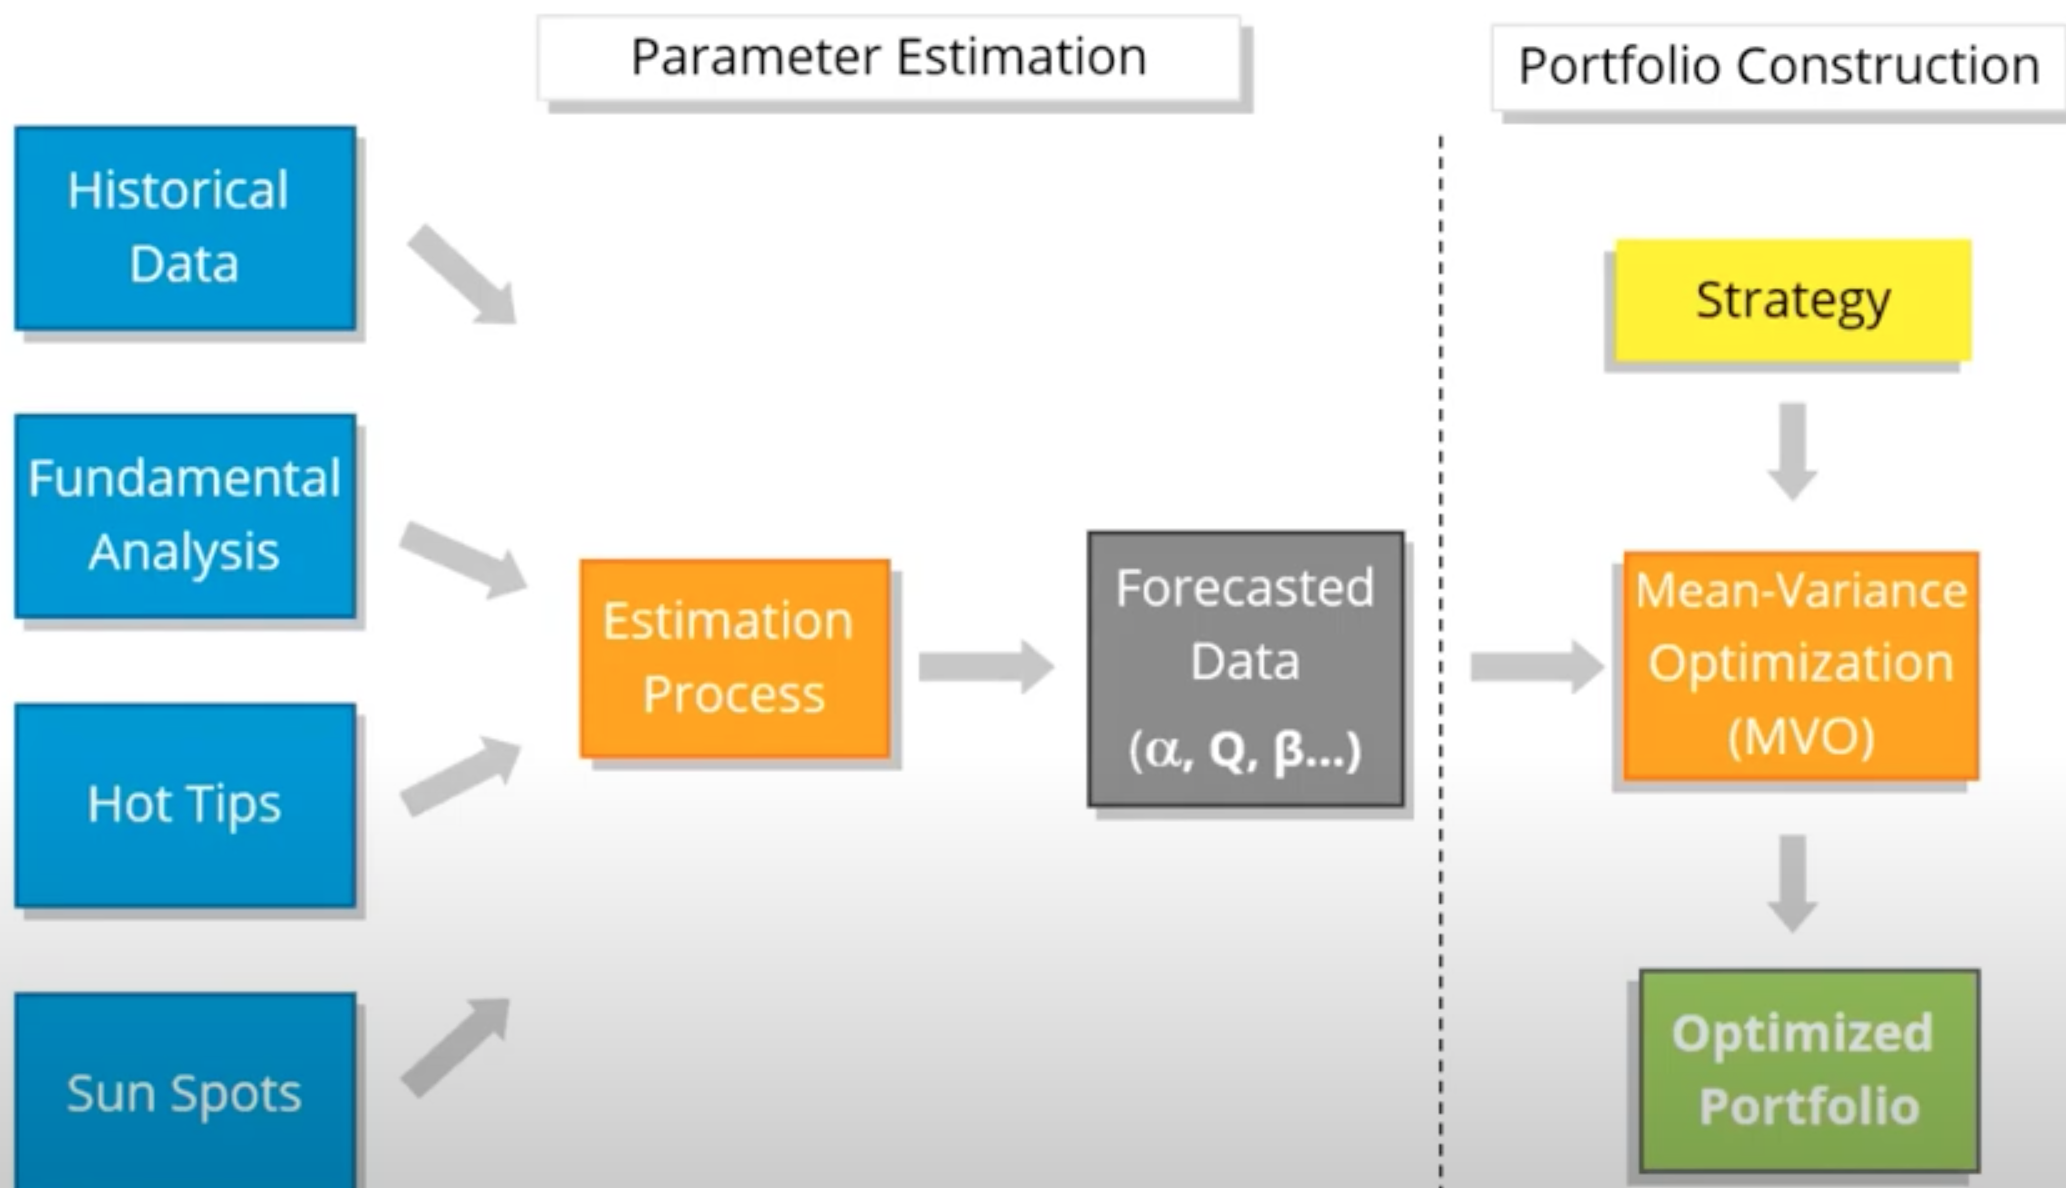

Questions

Can too much revenue also be considered as a risk?
- No matter amount of revenue there is always a risk since risk is measured as volatility in return price.
- Depending on revenue source. If revenue is coming from one customer/region or if they only have one product then it this could be considered a risk.
- Antitrust scrutiny or regulatory backlash